In [116]:
#Материалы:
#https://www.youtube.com/watch?v=gXBs4_3aKrs&feature=youtu.be
#https://habr.com/ru/company/hh/blog/427477/

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.style.use('qqplot')
from datetime import datetime, date
%matplotlib inline

In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
#Признаки рассчитываются для пары: П+стаж его работы в SkyEng в месяцах.
#Считается, что П работал в месяце A, если у него были успешные уроки в этом месяце.

#Рассматриваемые признаки (приведены к нормальному виду в файле):

#1. Пол - бинарный признак (1 - женщина)
#2. Регион (RU/не RU) - бинарный признак
#3.Город (Чтобы значения этого признака можно было сравнивать между собой, каждому региону присвоено общее число П, 
#входящих в этот регион, и взят от этого числа логарифм, чтобы сгладить разницу между очень крупными и мелкими городами)
#3. Возраст (разбит на группы: (18-23;24-29;30+) с присвоением номера (0,1,2). Возраст расситывается на момент рассматриваемого месяца
#Категория (A, B, C, Critical --> 0,1,2,3) - данные из KPI
#SLA начала 1у (Начинает ли П занятия вовремя в месяце) - доля уроков, для которых П завел комнату вовремя (минимум за 1 мин)
#SLA подтверждения У в TT (накопительно) - Вовремя ли П подтверждает У (в течение 12 часов)
#Процент переподбора (накопительно) - доля замен учителя



In [136]:
df = pd.read_excel(r'C:\Users\79035\clustering_of_teachers.xlsx')
df = df[df['Есть незаполненные поля'] == 'Нет']

In [137]:
df_for_clust = df[['gender_normal','age_normal', 'country_normal', 'city_normal', 'category_normal','sla_начала_1у_normal',
                  'Процент переподбора_normal', 'sla_подтверждения_У_normal', 'open_hours_normal', 'praim_time_hours_normal']]

#Копирую, иначе ругается при дальнейшей работе с датафрейм
df_for_clust = df_for_clust.copy()


In [138]:
df_for_clust = df_for_clust.apply(pd.to_numeric) # приводим к числовому типу данных, так как были текстовые значения
df_for_clust.dtypes

gender_normal                   int64
age_normal                    float64
country_normal                  int64
city_normal                   float64
category_normal               float64
sla_начала_1у_normal          float64
Процент переподбора_normal    float64
sla_подтверждения_У_normal    float64
open_hours_normal             float64
praim_time_hours_normal       float64
dtype: object

In [139]:
df_for_clust.head()

,gender_normal,age_normal,country_normal,city_normal,category_normal,sla_начала_1у_normal,Процент переподбора_normal,sla_подтверждения_У_normal,open_hours_normal,praim_time_hours_normal
218,0,-1.0,0,0.0,-0.666667,-0.4222,-0.888889,-0.019231,-0.880503,-0.776471
219,0,-1.0,0,0.0,-0.666667,-0.5556,-0.888889,-0.019231,-0.899371,-0.811765
220,0,-1.0,0,0.0,-0.666667,-0.5484,-0.888889,-0.019231,-0.855346,-0.729412
221,0,-1.0,0,0.0,-0.666667,-0.5455,-0.888889,-0.019231,-0.893082,-0.800000
222,0,-1.0,0,0.0,-0.666667,-0.5429,-0.888889,-0.019231,-0.893082,-0.800000


In [ ]:
#Применим алгоритм иерархической кластеризации и построим дендрограмму.
#Вычисления производятся функцией linkage. Аргументы функции: 
#таблица данных
#метод вычисления расстояний между кластерами(ward, single ,complete, average)
#метод вычисления расстояний между объектами (euclidean(default), citiblock (Манхетен), hamming, cosine)

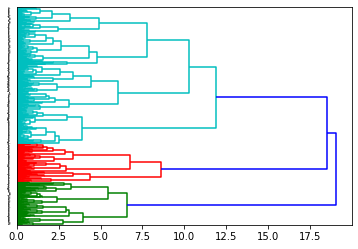

In [140]:
link = linkage(df_for_clust, 'ward', 'euclidean')
dn = dendrogram(link, orientation = "right", leaf_font_size = 0)

In [141]:
#Добавим к данным колонку cluster.
#Для этого используем функцию fcluster.
#Аргументы:
#linkage
#пороговое значение для расстояния между кластерами либо кол-во кластеров в зависимости от criterion
#maxclust для разбиения по заданному числу кластеров)

In [145]:
df_for_clust['cluster'] = fcluster(link, 3, criterion = 'maxclust')

In [146]:
df_for_clust.head()

,gender_normal,age_normal,country_normal,city_normal,category_normal,sla_начала_1у_normal,Процент переподбора_normal,sla_подтверждения_У_normal,open_hours_normal,praim_time_hours_normal,cluster
218,0,-1.0,0,0.0,-0.666667,-0.4222,-0.888889,-0.019231,-0.880503,-0.776471,3
219,0,-1.0,0,0.0,-0.666667,-0.5556,-0.888889,-0.019231,-0.899371,-0.811765,3
220,0,-1.0,0,0.0,-0.666667,-0.5484,-0.888889,-0.019231,-0.855346,-0.729412,3
221,0,-1.0,0,0.0,-0.666667,-0.5455,-0.888889,-0.019231,-0.893082,-0.800000,3
222,0,-1.0,0,0.0,-0.666667,-0.5429,-0.888889,-0.019231,-0.893082,-0.800000,3


In [147]:
df_for_clust.groupby('cluster').mean()


,gender_normal,age_normal,country_normal,city_normal,category_normal,sla_начала_1у_normal,Процент переподбора_normal,sla_подтверждения_У_normal,open_hours_normal,praim_time_hours_normal
cluster,,,,,,,,,,
1,-1.000000,-0.695946,0.0,-0.354208,-0.333333,-0.439981,-0.834410,-0.081763,-0.894357,-0.878007
2,-0.250000,-0.510417,-1.0,-0.586798,-0.543403,-0.248897,-0.838540,-0.092520,-0.897537,-0.894240
3,-0.007289,-0.486152,0.0,-0.324961,-0.500486,-0.336912,-0.856832,-0.064867,-0.886774,-0.891494


In [110]:
df_for_clust.groupby('cluster').size()

cluster
1    518
2    222
3    360
dtype: int64